example for how to use double ended connect to connect the minima in an existing database

we will use as an example system the Lennard-Jones cluster with a small number of atoms.
Since we don't already have a database, for this example we'll build a small one using
basinhopping

In [1]:
pwd

u'/home/garyfan/Desktop/pele/examples/disconnectivity_graph'

In [2]:
# import cluster from xyz file
# construct water cluster database, 

from pele import storage 
from molecular_cluster import MolecularCluster, Molecule

class WaterCluster(MolecularCluster):
    def define_molecule(self):
        # define atom types, internal permutations, bonds
        types=["O","H","H"]
        permlist=[[1,2]]
        bonds=[[0,1],[0,2]]
        return Molecule(types,permlist,bonds)

nmol = 5
system = WaterCluster(nmol)
print system.get_masses()
print system.get_permlist()


will compute the lowest eigenvector by diagonalizing the Hessian
[15.9994, 1.00794, 1.00794, 15.9994, 1.00794, 1.00794, 15.9994, 1.00794, 1.00794, 15.9994, 1.00794, 1.00794, 15.9994, 1.00794, 1.00794]
[[[0, 3, 6, 9, 12], [1, 4, 7, 10, 13], [2, 5, 8, 11, 14]], [1, 2], [4, 5], [7, 8], [10, 11], [13, 14]]


create the database where the minima and transition states will be stored

In [3]:
db = system.create_database()

In [ ]:
# from pele.utils.xyz import read_xyz
# db = system.create_database()
# fin = open("TIP4P2.xyz", 'r')
# tip4p2 = read_xyz(fin)
# energy = float(tip4p2.title.split()[-2])
# tip4p2.coords

use basinhopping to build a database of minima

In [4]:
bh = system.get_basinhopping(database=db, outstream=None)
bh.run(100)

use the logging module to turn of status printing for the connect runs

In [5]:
import logging
logger = logging.getLogger("pele.connect")
logger.setLevel("WARNING")

do a bunch of double ended connect runs to find transition states connecting the minima

In [6]:
from pele.landscape import ConnectManager
manager = ConnectManager(db)
for i in xrange(20):
    min1, min2 = manager.get_connect_job()
    connect = system.get_double_ended_connect(min1, min2, db, verbosity=-1)
    connect.connect()

sending a random connect job 12 19
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
stepping o

will compute the lowest eigenvector by diagonalizing the Hessian
sending a random connect job 100 120
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
energy decreased after uphill step -757.802018669 -> -758.00318506
  positive before check. setting all ok
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
sending a random connect job 24 2
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before chec

stepping off the transition state resulted in twice the same minima 229
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
energy decreased after uphill step -757.760839505 -> -757.912100812
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest e

  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok


  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the low

  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
sending a random connect job 262 469
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by

will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
sending a random connect job 67 76
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
stepping off the transition state resulted in twice the same minima 619
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvect

now that we have a database with minima and transition states we can build the disconnectivity graph

print some information about the database

In [7]:
print "number of minima", db.number_of_minima()
print "number of transition states", db.number_of_transition_states()

number of minima 701
number of transition states 519


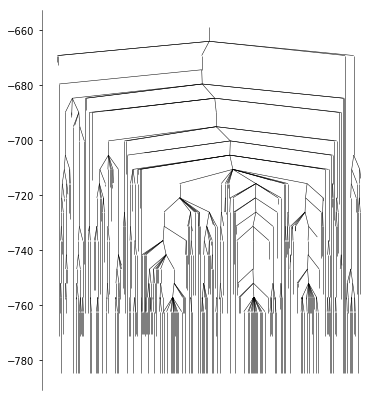

In [8]:
from pele.utils.disconnectivity_graph import DisconnectivityGraph, database2graph

graph = database2graph(db)
dgraph = DisconnectivityGraph(graph)
dgraph.calculate()
dgraph.plot()
import matplotlib.pyplot as plt
# plt.figure(figsize=(30,1))
plt.show()

In [ ]:
dgraph2 = DisconnectivityGraph(graph, nlevels=3)
                              #order_by_energy = True)
dgraph2.calculate()
dgraph2.plot()
#import matplotlib.pyplot as plt
# plt.figure(figsize=(30,1))
plt.show()

In [ ]:
dgraph3 = DisconnectivityGraph(graph, order_by_energy = True)
dgraph3.calculate()
dgraph3.plot()
#import matplotlib.pyplot as plt
# plt.figure(figsize=(30,1))
plt.show()